In [ ]:
#!pip install -U seaborn scipy matplotlib pandas

#!pip install numpy==1.24.4

In [ ]:
# To visualize plots in the notebook
%matplotlib inline

import numpy as np
import pandas as pd # To read data tables from csv files
import seaborn as sns # To plot statistical graphics
import matplotlib.pyplot as plt # To plot the figures

import os
from termcolor import colored
import tqdm
import scipy
import gc

# For plots and graphical results
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pylab

# That's default image size for this interactive session
pylab.rcParams['figure.figsize'] = 9, 6

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Cargar los datos desde el archivo JSON
data_path = '/content/drive/My Drive/proyecto/full_format_recipes.json'  # Clara
#data_path = '/content/drive/My Drive/Colab Notebooks/proyecto/full_format_recipes.json'  # Jorge
recipes_df = pd.read_json(data_path)  # Cargamos los datos con Pandas

# Visualización de la estructura básica de los datos
recipes_df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
0,"[1. Place the stock, lentils, celery, carrot, ...",7.0,2006-09-01 04:00:00+00:00,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...",426.0,None,30.0,2.500,"Lentil, Apple, and Turkey Wrap","[4 cups low-sodium vegetable or chicken stock,...",559.0
1,[Combine first 9 ingredients in heavy medium s...,23.0,2004-08-20 04:00:00+00:00,"[Food Processor, Onion, Pork, Bake, Bastille D...",403.0,This uses the same ingredients found in boudin...,18.0,4.375,Boudin Blanc Terrine with Red Onion Confit,"[1 1/2 cups whipping cream, 2 medium onions, c...",1439.0
2,[In a large heavy saucepan cook diced fennel a...,7.0,2004-08-20 04:00:00+00:00,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",165.0,None,6.0,3.750,Potato and Fennel Soup Hodge,"[1 fennel bulb (sometimes called anise), stalk...",165.0
3,[Heat oil in heavy large skillet over medium-h...,NaN,2009-03-27 04:00:00+00:00,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",NaN,The Sicilian-style tomato sauce has tons of Me...,NaN,5.000,Mahi-Mahi in Tomato Olive Sauce,"[2 tablespoons extra-virgin olive oil, 1 cup c...",NaN
4,[Preheat oven to 350°F. Lightly grease 8x8x2-i...,32.0,2004-08-20 04:00:00+00:00,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",547.0,None,20.0,3.125,Spinach Noodle Casserole,"[1 12-ounce package frozen spinach soufflé, th...",452.0


In [ ]:
recipes_df.describe()

,fat,calories,protein,rating,sodium
count,1.590800e+04,1.597600e+04,15929.000000,20100.000000,1.597400e+04
mean,3.460975e+02,6.307857e+03,99.946199,3.713060,6.211474e+03
std,2.043102e+04,3.585851e+05,3835.616663,1.343144,3.328903e+05
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,7.000000e+00,1.980000e+02,3.000000,3.750000,8.000000e+01
50%,1.700000e+01,3.310000e+02,8.000000,4.375000,2.940000e+02
75%,3.300000e+01,5.860000e+02,27.000000,4.375000,7.110000e+02
max,1.722763e+06,3.011122e+07,236489.000000,5.000000,2.767511e+07


In [ ]:
# Extracción de las características y variables objetivo
text_features = recipes_df[['desc', 'directions','title']]
categories=recipes_df['categories']
numeric_features = recipes_df[['fat', 'protein', 'calories', 'sodium','date']]
target = recipes_df['rating']#variable de salida

# Combinar características de texto y numéricas en una matriz de características
# Aquí usaremos las columnas de texto y de valores numéricos como entrada X y el rating como y
X_text = text_features.values  # Convertir a matriz de NumPy o usar vectorización directamente en DataFrames
X_numeric = numeric_features.values
X = np.hstack([X_text, X_numeric])  # Combinar ambas matrices horizontalmente

# Información del dataset
n_samples = X.shape[0]  # Número de observaciones
n_vars = X.shape[1]      # Número de variables (incluye texto y numéricas)
feature_names = text_features.columns.tolist() + numeric_features.columns.tolist()

# Imprimir información del dataset
print("El número de recetas es:", n_samples)
print("Número de variables/características:", n_vars)
print("Nombres de las características:", feature_names)

El número de recetas es: 20130
Número de variables/características: 8
Nombres de las características: ['desc', 'directions', 'title', 'fat', 'protein', 'calories', 'sodium', 'date']


###**1. Análisis de las variables de entrada**

**DICCIONARIO MAPEO CATEGORIA CON SU VALOR**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Recorremos las categorías y creamos una lista (categorías sin repetir)
categories_list=[]
for i in categories:
  if type(i)==list:
    categories_list.extend(i)
  else:
    categories_list.append(i)
categories_list=list(set(categories_list))

categories_str = [str(cat) for cat in categories_list]

categories_encoder = LabelEncoder()

# Con fit nos aprendemos las categorías y con transform se hace el mapeo (asigna un número a cada categoría)
map = categories_encoder.fit_transform(categories_str)

# Diccionario donde relacionamos la categoría con su valor
cat_to_map = dict(zip(categories_list, map))
print("\nMapeo categoría a numero:")
print(cat_to_map)


Mapeo categoría a numero:
{'Entertaining': 200, 'Zucchini': 668, 'Sauce': 542, 'Meatball': 368, 'Rosemary': 522, 'Pancake': 434, 'Organic': 427, 'Celery': 106, 'Freezer Food': 223, 'Corn': 151, 'Texas': 615, 'Wine': 660, 'Cocktail': 133, 'Canada': 94, 'Pasta Maker': 447, 'Cod': 136, 'Bitters': 50, 'Dill': 178, 'Healthy': 266, 'Brussel Sprout': 77, 'Maple Syrup': 355, 'Healdsburg': 265, 'Buffalo': 78, 'Graduation': 241, 'Tortillas': 622, 'Stew': 589, 'Leafy Green': 321, 'Seattle': 548, 'Egg': 192, 'Lobster': 334, 'Cumin': 165, 'Kid-Friendly': 305, 'Lingonberry': 332, 'Clove': 131, 'Boston': 59, 'Candy': 95, 'Engagement Party': 198, 'Marinate': 359, 'Chicken': 116, 'Condiment/Spread': 144, 'New Jersey': 398, 'Pork': 481, 'Non-Alcoholic': 407, 'Créme de Cacao': 160, 'Campari': 92, 'Triple Sec': 625, 'Brownie': 75, 'Raw': 514, 'Cauliflower': 104, 'Duck': 188, 'Cashew': 102, 'Digestif': 177, 'Kidney Friendly': 306, 'Low Sodium': 344, 'Arizona': 20, 'Italy': 291, 'Soy Sauce': 575, 'Frittata

**RATINGS MÁS ALTOS**

Analizamos las distintas categorías de las recetas en función de su *rating* y visualizamos las 10 que tienen mayor *rating*.

<ipython-input-7-a030c75cee5c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating', y='categories', data=top_categories, palette='viridis')


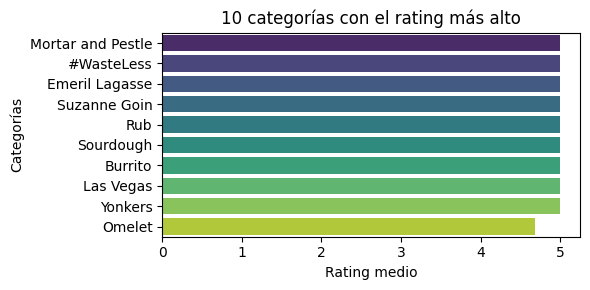

In [ ]:
# Creamos un nuevo DataFrame en el que cada fila se corresponde a una categoría,
# independientemente de si pertenecen a la misma receta
expanded_df = recipes_df.explode('categories')

# Calculamos la media de los ratings para cada categoría
category_ratings = expanded_df.groupby('categories')['rating'].mean().reset_index()

# Ordenamos las categorías según su rating, de mayor a menor
category_ratings = category_ratings.sort_values(by='rating', ascending=False)

# Visualizamos las 10 categorías con mayor rating
top_10 = 10
top_categories = category_ratings.head(top_10)

plt.figure(figsize=(6, 3))
sns.barplot(x='rating', y='categories', data=top_categories, palette='viridis')
plt.title(f'{top_10} categorías con el rating más alto')
plt.xlabel('Rating medio')
plt.ylabel('Categorías')
plt.tight_layout()
plt.show()

#Las categorías con puntuaciones promedio más altas podrían indicar las preferencias de los usuarios o la calidad de las recetas.
#Estas categorías podrían ser características importantes para predecir la calificación de una receta.
#Por ejemplo, si "postres" y "productos horneados" tienen calificaciones altas, esto podría sugerir que los usuarios prefieren recetas dulces y indulgentes.

**CORRELACIÓN**

In [ ]:
# Crear un DataFrame con una columna por categoría
all_categories = list(cat_to_map.keys())  # Obtener todas las categorías únicas
category_df = pd.DataFrame(0, index=recipes_df.index, columns=all_categories)

# 2. Rellenar el DataFrame con 1 si la receta pertenece a la categoría
for index, row in recipes_df.iterrows():
  # Check if 'categories' is a list or string before iterating
  if isinstance(row['categories'], (list, str)):
    for category in row['categories']:
      if category in all_categories:
        category_df.loc[index, category] = 1
  else:
    continue

# Concatenamos el DataFrame de categorías con la columna de rating
category_rating_df = pd.concat([category_df, recipes_df['rating']], axis=1)

# Calculamos la correlación entre cada categoría y el rating
correlations = category_rating_df.corr()['rating'].drop('rating')  # Excluir la correlación de rating consigo mismo

print("Correlaciones categorías: \n")
print(correlations)

#Interpretación
#la correlación indica la relación lineal entre las categorías y los raings

Correlaciones categorías: 

Entertaining           -0.000612
Zucchini                0.002416
Sauce                  -0.033181
Meatball               -0.008737
Rosemary                0.032324
                          ...   
Butterscotch/Caramel   -0.019231
Buffet                  0.020294
Sweet Potato/Yam        0.024807
Aperitif               -0.034396
Peanut Butter          -0.023291
Name: rating, Length: 675, dtype: float64


**HISTOGRAMAS**

Analizamos la frecuencia de aparición en las recetas de las distintas categorías, centrándonos en las 15 con rating medio más alto y las 15 con rating medio más bajo. Para la comparación, usamos histogramas.

<ipython-input-9-f9422388bf4f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_15_freq.values()), y=list(top_15_freq.keys()), palette='viridis')


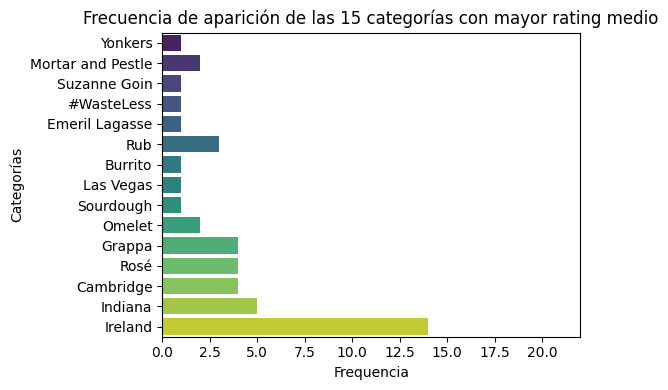

<ipython-input-9-f9422388bf4f>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(bottom_15_freq.values()), y=list(bottom_15_freq.keys()), palette='viridis')


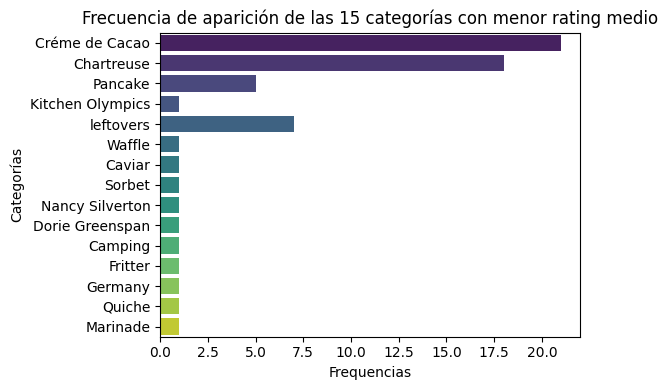

In [ ]:
from collections import Counter

# Creamos un diccionario para almacenar los ratings de las categorías
cat_ratings = {}
for index, row in recipes_df.iterrows():
    rating = row['rating']
    categories = row['categories']
    if isinstance(categories, list):
        for category in categories:
            if category in cat_to_map:  # Check if category is in the mapping
                cat_ratings.setdefault(category, []).append(rating)

# Calculamos el rating medio de cada categoría
rating_medio = {category: sum(ratings) / len(ratings) for category, ratings in cat_ratings.items()}

# Ordenamos las categorías de mayor a menor rating
cat_ordenadas = sorted(rating_medio.items(), key=lambda item: item[1], reverse=True)

# Calculamos la frecuencia de aparición de las categorías
all_categories = [category for sublist in recipes_df['categories'] if isinstance(sublist, list) for category in sublist]
cat_counts = Counter(all_categories)

# Tomamos las 15 categorías con mayor rating y las 15 con menor rating
top_15_cat = [category for category, rating in cat_ordenadas[:15]]
bottom_15_cat = [category for category, rating in cat_ordenadas[-15:]]

# Seleccionamos las frecuencias de aparición de las categorías que queremos
top_15_freq = {category: cat_counts[category] for category in top_15_cat}
bottom_15_freq = {category: cat_counts[category] for category in bottom_15_cat}

# Representamos los histogramas
plt.figure(figsize=(6, 4))
sns.barplot(x=list(top_15_freq.values()), y=list(top_15_freq.keys()), palette='viridis')
plt.title('Frecuencia de aparición de las 15 categorías con mayor rating medio')
plt.xlabel('Frequencia')
plt.xlim(0, 22)
plt.ylabel('Categorías')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(x=list(bottom_15_freq.values()), y=list(bottom_15_freq.keys()), palette='viridis')
plt.title('Frecuencia de aparición de las 15 categorías con menor rating medio')
plt.xlabel('Frequencias')
plt.xlim(0, 22)
plt.ylabel('Categorías')
plt.tight_layout()
plt.show()

**VARIABILIDAD DEL RATING DENTRO DE UNA MISMA CATEGORIA**

*(PARA LAS 10 CATEGORÍAS MÁS FRECUENTES)*

Visualizamos la variabilidad de los ratings dentro de una misma categoría. Lo haremos para las 10 categorías más frecuentes. El análisis lo realizaremos a partir del diagrama de caja y bigotes.

<ipython-input-44-4c264d9673e1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['categories'] = filtered_df['categories'].astype(str)
<ipython-input-44-4c264d9673e1>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='categories', y='rating', data=filtered_df, palette='viridis')


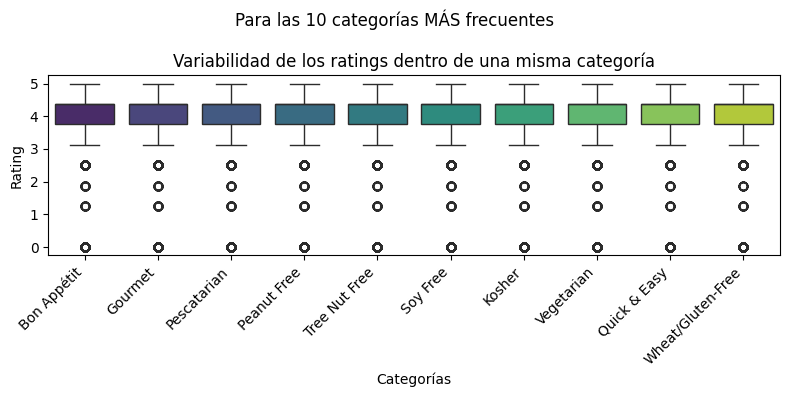

In [ ]:
# Tomamos las 10 categorías más frecuentes
top_10_cat = [category for category, count in cat_counts.most_common(10)]

# Creamos un nuevo DataFrame en el que cada fila se corresponde a una categoría,
# independientemente de si pertenecen a la misma receta
expanded_df = recipes_df.explode('categories')

# Tomamos del nuevo DataFrame las 10 categorías seleccionadas
filtered_df = expanded_df[expanded_df['categories'].isin(top_10_cat)]
filtered_df['categories'] = filtered_df['categories'].astype(str)

# Representamos el diagrama de caja y bigotes
plt.figure(figsize=(8, 4))
sns.boxplot(x='categories', y='rating', data=filtered_df, palette='viridis')
plt.title('Variabilidad de los ratings dentro de una misma categoría')
plt.suptitle('Para las 10 categorías MÁS frecuentes', fontsize=12)
plt.xlabel('Categorías')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**VARIABILIDAD DEL RATING DENTRO DE UNA MISMA CATEGORIA**

*(PARA LAS 10 CATEGORÍAS MENOS FRECUENTES)*

Visualizamos la variabilidad de los ratings dentro de una misma categoría. Lo haremos para las 10 categorías menos frecuentes. El análisis lo realizaremos a partir del diagrama de caja y bigotes.

<ipython-input-45-34b89aa58a18>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['categories'] = filtered_df['categories'].astype(str)
<ipython-input-45-34b89aa58a18>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='categories', y='rating', data=filtered_df, palette='viridis')


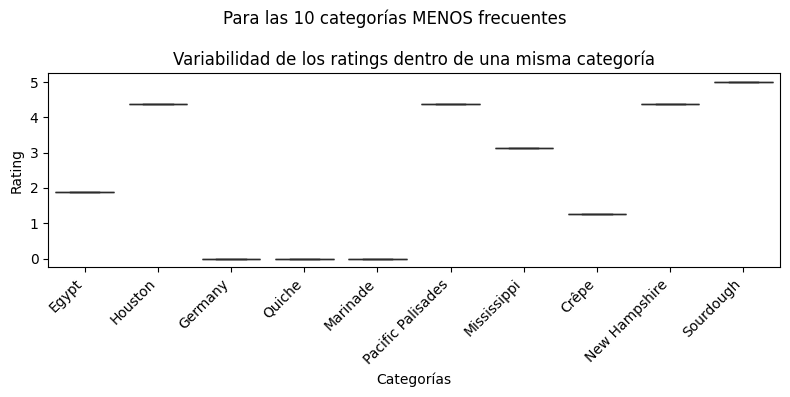

In [ ]:
# Tomamos las 10 categorías menos frecuentes
bottom_10_cat = [category for category, count in cat_counts.most_common()][-10:]

# Tomamos del nuevo DataFrame las 10 categorías seleccionadas
filtered_df = expanded_df[expanded_df['categories'].isin(bottom_10_cat)]
filtered_df['categories'] = filtered_df['categories'].astype(str)

# Representamos el diagrama de caja y bigotes
plt.figure(figsize=(8, 4))
sns.boxplot(x='categories', y='rating', data=filtered_df, palette='viridis')
plt.title('Variabilidad de los ratings dentro de una misma categoría')
plt.suptitle('Para las 10 categorías MENOS frecuentes', fontsize=12)
plt.xlabel('Categorías')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-54-739ee5e0a86b>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_top['categories'] = filtered_df_top['categories'].astype(str)
<ipython-input-54-739ee5e0a86b>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='categories', y='rating', data=filtered_df_top, palette='viridis')


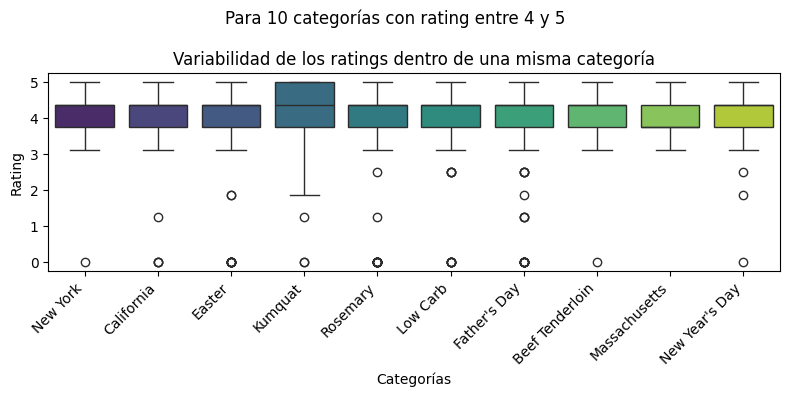

<ipython-input-54-739ee5e0a86b>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_bottom['categories'] = filtered_df_bottom['categories'].astype(str)
<ipython-input-54-739ee5e0a86b>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='categories', y='rating', data=filtered_df_bottom, palette='viridis')


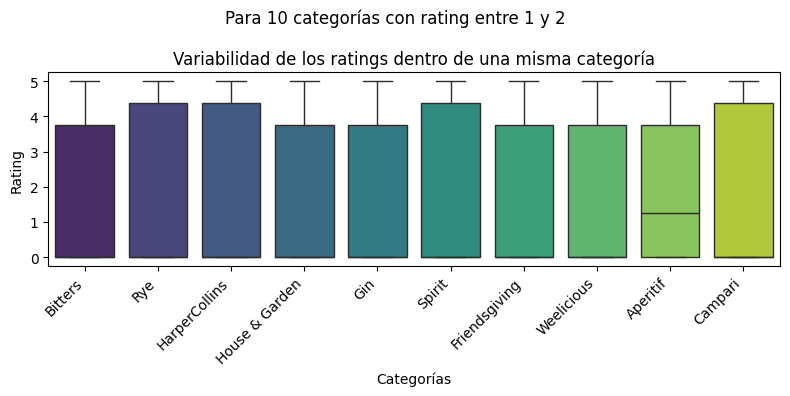

In [ ]:
from collections import Counter

# Ordenamos las categorías de mayor a menor rating
cat_ordenadas = sorted(rating_medio.items(), key=lambda item: item[1], reverse=True)

# Tomamos las 10 categorías con mayor rating y las 10 con menor rating
rating_4_5_cat = [category for category, rating in rating_medio.items() if 4 <= rating <= 5]
top_10_cat = rating_4_5_cat[:10]

rating_1_2_cat = [category for category, rating in rating_medio.items() if 1 <= rating <= 2]
bottom_10_cat = rating_1_2_cat[:10]

# Diagrama de caja y bigotes para las 10 categorías con mayor rating
filtered_df_top = expanded_df[expanded_df['categories'].isin(top_10_cat)]
filtered_df_top['categories'] = filtered_df_top['categories'].astype(str)

plt.figure(figsize=(8, 4))
sns.boxplot(x='categories', y='rating', data=filtered_df_top, palette='viridis')
plt.title('Variabilidad de los ratings dentro de una misma categoría')
plt.suptitle('Para 10 categorías con rating entre 4 y 5', fontsize=12)
plt.xlabel('Categorías')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Diagrama de caja y bigotes para las 10 categorías con menor rating
filtered_df_bottom = expanded_df[expanded_df['categories'].isin(bottom_10_cat)]
filtered_df_bottom['categories'] = filtered_df_bottom['categories'].astype(str)

plt.figure(figsize=(8, 4))
sns.boxplot(x='categories', y='rating', data=filtered_df_bottom, palette='viridis')
plt.title('Variabilidad de los ratings dentro de una misma categoría')
plt.suptitle('Para 10 categorías con rating entre 1 y 2', fontsize=12)  # Cambiar título
plt.xlabel('Categorías')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

###**2.  Preprocesado**

1.   Text Wrangling
2.   Tokenization
3.   Homogenization
4.   Cleaning

In [ ]:
import re
import nltk

def check_nltk_packages():
  packages = ['punkt','stopwords','omw-1.4','wordnet']

  for package in packages:
    try:
      nltk.data.find('tokenizers/' + package)
    except LookupError:
      nltk.download(package)
check_nltk_packages()

try:
  import lxml
except ModuleNotFoundError:
  %pip install lxml

try:
  import contractions
except ModuleNotFoundError:
  %pip install contractions
  import contractions

from bs4 import BeautifulSoup
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 11.3 MB/s eta 0:00:00


#### **2.1 Wrangling**

In [ ]:
def wrangle_text(text):
    # Asegurarnos de que sea una cadena
    text = str(text)

    # Eliminamos las comas, guiones, puntos y números
    text = re.sub(r',', '', text)
    text = re.sub(r'-', '', text)
    text = re.sub(r'\.', '', text)
    text = re.sub(r'\d+', '', text)

    return text

# Datos sin wrangling
print('\n====================================== Original ======================================')
print(recipes_df[['directions', 'desc']].head())

# Datos con wrangling
print('\n====================================== Con wrangling ======================================')

recipes_df['p_directions'] = recipes_df['directions'].apply(wrangle_text)
recipes_df['p_desc'] = recipes_df['desc'].apply(wrangle_text)

print(recipes_df[['p_directions', 'p_desc']].head())


====================================== Original ======================================
                                          directions  \
0  [1. Place the stock, lentils, celery, carrot, ...   
1  [Combine first 9 ingredients in heavy medium s...   
2  [In a large heavy saucepan cook diced fennel a...   
3  [Heat oil in heavy large skillet over medium-h...   
4  [Preheat oven to 350°F. Lightly grease 8x8x2-i...   

                                                desc  
0                                               None  
1  This uses the same ingredients found in boudin...  
2                                               None  
3  The Sicilian-style tomato sauce has tons of Me...  
4                                               None  

====================================== Con wrangling ======================================
                                        p_directions  \
0  [' Place the stock lentils celery carrot thyme...   
1  ['Combine first  ingredients in heavy

#### **2.2 Tokenization**

In [ ]:
from nltk.tokenize import wordpunct_tokenize
from nltk.tokenize import sent_tokenize
import nltk
nltk.download('punkt_tab')

print('\n====================================== Original ======================================')
print(recipes_df[['directions', 'desc']].head())

def tokenize_text(text):
  review_tokens_sent = []
  for sent in sent_tokenize(text):
    sentence_tokens = wordpunct_tokenize(sent)
    review_tokens_sent.append(sentence_tokens)

  return review_tokens_sent

# Applicar función a vector direcciones y descripción
recipes_df['tokens_directions'] = recipes_df['p_directions'].apply(tokenize_text)
recipes_df['tokens_desc'] = recipes_df['p_desc'].apply(tokenize_text)

print('\n====================================== Con tokenización ======================================')
print(recipes_df[['tokens_directions', 'tokens_desc']].head())

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.



====================================== Original ======================================
                                          directions  \
0  [1. Place the stock, lentils, celery, carrot, ...   
1  [Combine first 9 ingredients in heavy medium s...   
2  [In a large heavy saucepan cook diced fennel a...   
3  [Heat oil in heavy large skillet over medium-h...   
4  [Preheat oven to 350°F. Lightly grease 8x8x2-i...   

                                                desc  
0                                               None  
1  This uses the same ingredients found in boudin...  
2                                               None  
3  The Sicilian-style tomato sauce has tons of Me...  
4                                               None  

====================================== Con tokenización ======================================
                                   tokens_directions  \
0  [[[', Place, the, stock, lentils, celery, carr...   
1  [[[', Combine, first, ingredients,

#### **2.3 Homogenization**

In [ ]:
#Se queda solo con caracteres alfanumericos y los pasa a minuscula
def filter_tokens(tokens):

  filtered_tokens_list = []
  tokens_list = tokens
  for tokens in tokens_list: # Iterate over each sentence's tokens
    tokens_filtered = [token.lower() for token in tokens if token.isalnum()]
    filtered_tokens_list.extend(tokens_filtered)

  return filtered_tokens_list

recipes_df['filtered_directions'] = recipes_df['tokens_directions'].apply(filter_tokens)
recipes_df['filtered_desc'] = recipes_df['tokens_desc'].apply(filter_tokens)

print('\n====================================== Original ======================================')
print(recipes_df[['directions', 'desc']].head())

print('\n====================================== Con filtrado ======================================')
print(recipes_df[['filtered_directions', 'filtered_desc']].head())


====================================== Original ======================================
                                          directions  \
0  [1. Place the stock, lentils, celery, carrot, ...   
1  [Combine first 9 ingredients in heavy medium s...   
2  [In a large heavy saucepan cook diced fennel a...   
3  [Heat oil in heavy large skillet over medium-h...   
4  [Preheat oven to 350°F. Lightly grease 8x8x2-i...   

                                                desc  
0                                               None  
1  This uses the same ingredients found in boudin...  
2                                               None  
3  The Sicilian-style tomato sauce has tons of Me...  
4                                               None  

====================================== Con filtrado ======================================
                                 filtered_directions  \
0  [place, the, stock, lentils, celery, carrot, t...   
1  [combine, first, ingredients, in, heav

In [ ]:
from nltk.stem import WordNetLemmatizer

# Inicializar el lematizador
wnl = WordNetLemmatizer()

# Función para aplicar la lematización
def lemmatize(tokens):
    """Applies lemmatization to a list of tokens."""
    return [wnl.lemmatize(token) for token in tokens]

# Aplicar lematización a las columnas de tokens filtrados
recipes_df['l_directions'] = recipes_df['filtered_directions'].apply(lemmatize)
recipes_df['l_desc'] = recipes_df['filtered_desc'].apply(lemmatize)

# Imprimir resultados
print('\n====================================== Original ======================================')
print(recipes_df[['directions', 'desc']].head())

print('\n=============  Lemmatization  =============')
print(recipes_df[['l_directions', 'l_desc']].head())


====================================== Original ======================================
                                          directions  \
0  [1. Place the stock, lentils, celery, carrot, ...   
1  [Combine first 9 ingredients in heavy medium s...   
2  [In a large heavy saucepan cook diced fennel a...   
3  [Heat oil in heavy large skillet over medium-h...   
4  [Preheat oven to 350°F. Lightly grease 8x8x2-i...   

                                                desc  
0                                               None  
1  This uses the same ingredients found in boudin...  
2                                               None  
3  The Sicilian-style tomato sauce has tons of Me...  
4                                               None  

=============  Lemmatization  =============
                                        l_directions  \
0  [place, the, stock, lentil, celery, carrot, th...   
1  [combine, first, ingredient, in, heavy, medium...   
2  [in, a, large, heavy, saucepa

#### **2.4 Cleaning**




In [ ]:
from nltk.corpus import stopwords
stopwords_en = stopwords.words('english')

#Quitar palabras básicas

def cleaning(tokens):
  """Removes stop words from a list of tokens."""
  clean_tokens = [token for token in tokens if token not in stopwords_en]
  return clean_tokens

# Hacemos cleaning de la versión lemmatized
recipes_df['clean_directions'] = recipes_df['l_directions'].apply(cleaning)
recipes_df['clean_desc'] = recipes_df['l_desc'].apply(cleaning)

print('\n====================================== Original ======================================')
print(recipes_df[['directions', 'desc']].head())

print('\n====================================== Con cleaning ======================================')
print(recipes_df[['clean_directions', 'clean_desc']].head())


====================================== Original ======================================
                                          directions  \
0  [1. Place the stock, lentils, celery, carrot, ...   
1  [Combine first 9 ingredients in heavy medium s...   
2  [In a large heavy saucepan cook diced fennel a...   
3  [Heat oil in heavy large skillet over medium-h...   
4  [Preheat oven to 350°F. Lightly grease 8x8x2-i...   

                                                desc  
0                                               None  
1  This uses the same ingredients found in boudin...  
2                                               None  
3  The Sicilian-style tomato sauce has tons of Me...  
4                                               None  

====================================== Con cleaning ======================================
                                    clean_directions  \
0  [place, stock, lentil, celery, carrot, thyme, ...   
1  [combine, first, ingredient, heavy, me

### **3. Vectorization**

#### ***3.1 TF-IDF***
Da valores altos a los términos que aparecen mucho en un documento en particular y muy poco en otros documentos.

*Term Frecuency (TF)*: frecuencia de aparición de una palabra en un determinado documento.

*Inverse Document Frecuency (IDF)*: logaritmo del nº de documentos totales dividido entre el nº de documentos en los que aparece la palabra.

Por tanto, estamos penalizando la frecuencia de aparición de la palabra si aparece en muchos documentos (lo cual le ocurre a las palabras básicas).

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

recipes_df['text'] = recipes_df['clean_directions'].astype(str)

# 1. Creamos el vectorizador TF-IDF
tfidf = TfidfVectorizer(
    # Solo incluye términos que aparecen en al menos 5 documentos. Así se eliminan
    # palabras muy raras que no son informativas

    min_df=5,
    # Solo incluye términos que aparecen en un máximo del 80% de los documentos.
    # Así se eliminan palabras muy comunes que probablemente no sean muy descriptivas (explicar informe, distinto)
    max_df=0.8,
)

# 2. Adaptamos el vectorizador a nuestros datos
tfidf.fit(recipes_df['text'])

# 3. Transformamos los datos a matriz de vectores TF-IDF.
# Cada fila es una receta y cada columna una palabra del vocabulario.
# La misma palabra puede tener diferentes puntuaciones TF-IDF en diferentes filas (recetas) de la matriz.

recipes_tfidf = tfidf.transform(recipes_df['text'])
print(recipes_tfidf.shape)
print(recipes_tfidf)


###########################EJEMPLO###########################

# Seleccionamos una receta
n_recipe = 5

#Se aplica transformación TF-IDF solo a esa receta

recipe_text = recipes_df['text'][n_recipe]
recipe_tfidf_single = tfidf.transform([recipe_text])
print('\nTF-IDF applying the transformation only to the document')
print(recipe_tfidf_single)

# Display de los términos de esa representación TF-IDF
terms = tfidf.get_feature_names_out()
tfidf_values = recipe_tfidf_single.toarray()[0]

# Create a DataFrame to show the terms and their TF-IDF values
tfidf_terms_df = pd.DataFrame({
    'Term': terms,
    'TF-IDF': tfidf_values
}).sort_values(by='TF-IDF', ascending=False)

print('\nTop 10 terms with the highest TF-IDF values for the recipe:')
print(tfidf_terms_df.head(10))

(20130, 3924)
  (0, 24)	0.028619015092099388
  (0, 118)	0.08959932554480107
  (0, 147)	0.12591333946529357
  (0, 163)	0.10094220189633478
  (0, 228)	0.07606767808066023
  (0, 295)	0.04487752446556755
  (0, 308)	0.10537064565056703
  (0, 311)	0.06055583147669637
  (0, 316)	0.028567612497536744
  (0, 352)	0.045096321594083146
  (0, 475)	0.0773669796848955
  (0, 499)	0.08081518364220044
  (0, 500)	0.05884407013083546
  (0, 595)	0.07661220805267203
  (0, 715)	0.04237205677388737
  (0, 800)	0.08215506616773431
  (0, 923)	0.11233908912457627
  (0, 974)	0.06317070194085671
  (0, 1021)	0.052578081648064705
  (0, 1046)	0.05788678407205056
  (0, 1108)	0.08358877957083448
  (0, 1298)	0.14085341737426677
  (0, 1566)	0.030069388045010487
  (0, 1659)	0.04541349114187191
  (0, 1739)	0.04527305796694218
  :	:
  (20129, 2518)	0.04931068280306377
  (20129, 2531)	0.030721303465415784
  (20129, 2548)	0.025953028400597426
  (20129, 2560)	0.045768058029965634
  (20129, 2658)	0.06664648681061751
  (20129, 27

In [ ]:
import scipy.sparse

# Guardamos la matriz en un archivo .npz
scipy.sparse.save_npz('/content/drive/My Drive/proyecto/TFIDF.npz', recipes_tfidf) #Clara

In [ ]:
import joblib

# Guardar el vectorizador TF-IDF
vectorizer_path = '/content/drive/My Drive/Colab Notebooks/proyecto/tfidf_vectorizer.joblib' #Jorge
joblib.dump(tfidf, vectorizer_path)

print(f"Vectorizador TF-IDF guardado en {vectorizer_path}")

Vectorizador TF-IDF guardado en /content/drive/My Drive/Colab Notebooks/proyecto/tfidf_vectorizer.joblib


In [ ]:
#!pip install gensim
#%pip uninstall gensim scipy
#!pip install --upgrade --force-reinstall scipy
#!pip install gensim==4.3.0

#!pip uninstall -y numpy
#!pip install numpy==1.24.4

In [ ]:
# High quality figures
%config InlineBackend.figure_format = 'retina'
# Figures style
sns.set_style("darkgrid")
sns.color_palette("deep")
# Figues size
plt.rcParams['figure.figsize'] = [8, 6]

# eliminar warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore',module='compress_fasttext')

%load_ext google.colab.data_table

#### ***3.2 Word2Vec***

Método basado en predicciones para aprender vectores de palabras.

- Tenemos un corpus de palabras.
- Vamos por el texto con una ventana que se mueve de palabra en palabra. En cada paso, la palabra *central* y las palabras *contexto* van cambiando.
- Se calculan las probabilidades de las palabras *contexto* dada una palabra *central*.
- A través del entrenamiento se ajustan los vectores de palabra para maximizar la probabilidad de que las palabras de contexto sean predichas correctamente para una palabra central.

In [ ]:
!pip install numpy==1.24.4
!pip install --upgrade scipy
!pip install --upgrade gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 60.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 18.2 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.1 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 19.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [ ]:
from gensim.models import Word2Vec

# Entrenamiento Word2Vec
model = Word2Vec(sentences=recipes_df['clean_directions'], vector_size=100, window=5, min_count=1, workers=4)

def w2v_vector(tokens, model):
    """Calculate the average Word2Vec vector para cada receta"""
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# Aplicamos la vectorización a las directions de cada receta
recipes_df['w2v_directions'] = recipes_df['clean_directions'].apply(lambda tokens: w2v_vector(tokens, model))

# Convertimos los vectores a arrays NumPy (opcional)
w2v_directions = np.vstack(recipes_df['w2v_directions'].values)

#check dimensiones w2v
print(w2v_directions.shape)


(20130, 100)


In [ ]:
print(w2v_directions)

[[-1.73336104e-01 -2.57746354e-02  9.33883414e-02 ... -2.72780899e-02
   5.83945634e-03 -1.33805469e-01]
 [ 5.82860112e-02 -1.79887921e-01  3.59000176e-01 ... -7.68702030e-02
   3.47673409e-02 -4.03574735e-01]
 [ 2.99858123e-01  2.91058034e-01 -3.45430404e-01 ... -3.59422535e-01
   1.04077589e-02 -2.48490170e-01]
 ...
 [-1.72359675e-01  5.69217689e-02  1.33926600e-01 ... -1.06936663e-01
  -2.07901020e-02 -7.33602270e-02]
 [ 1.12784188e-02 -1.92944735e-01 -1.71378911e-01 ...  1.28418982e-01
  -1.35042906e-01 -2.91825920e-01]
 [-1.20360412e-01 -6.57443523e-01  2.53449585e-02 ...  4.38838644e-04
  -3.39074254e-01 -4.67184812e-01]]


In [ ]:
# Me guardo los embeddings generados con word2vec
np.save('/content/drive/My Drive/proyecto/w2v_embeddings.npy', w2v_directions)

**PRUEBA CON 200 dimensiones**

In [ ]:
# Entrenamiento Word2Vec
model = Word2Vec(sentences=recipes_df['clean_directions'], vector_size=200, window=5, min_count=1, workers=4)

def w2v_vector(tokens, model):
    """Calculate the average Word2Vec vector para cada receta"""
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# Aplicamos la vectorización a las directions de cada receta
recipes_df['w2v_directions'] = recipes_df['clean_directions'].apply(lambda tokens: w2v_vector(tokens, model))

# Convertimos los vectores a arrays NumPy
w2v_200 = np.vstack(recipes_df['w2v_directions'].values)

#check dimensiones w2v
print(w2v_200.shape)

(20130, 200)


In [ ]:
# Guardado de embeddings
np.save('/content/drive/My Drive/proyecto/w2v_200.npy', w2v_200)

##### *3.2.1. Representaciones interesantes de al representación vectorial de word2vec*

**Distribución espacial embeddings**

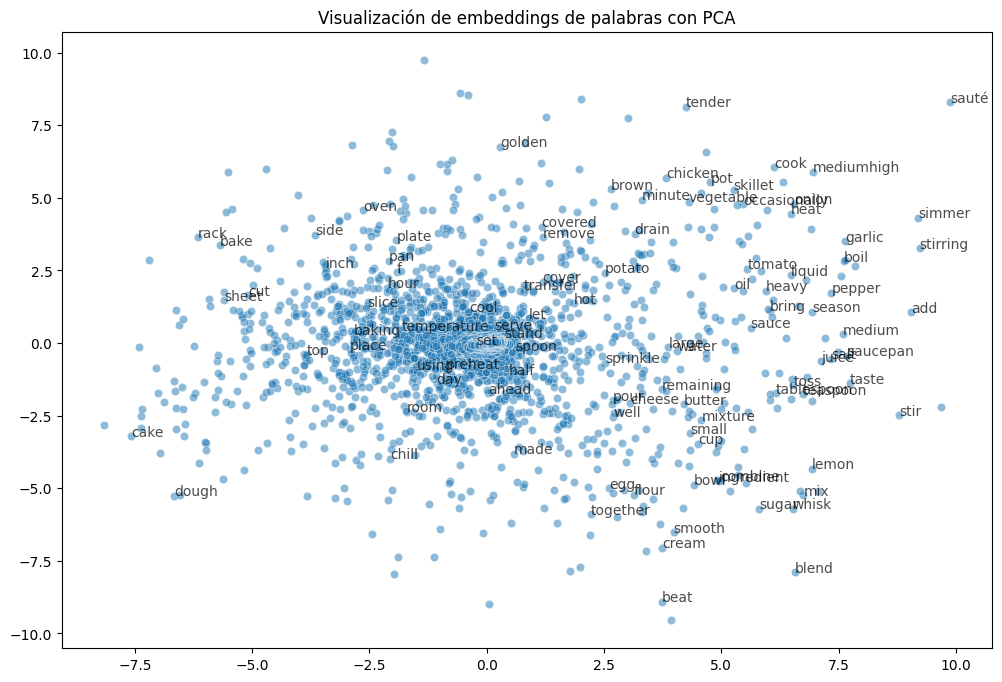

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

# Extraer las palabras y sus embeddings del modelo Word2Vec
words = list(model.wv.index_to_key)
word_vectors = model.wv[words]

# Reducir dimensionalidad con PCA
pca = PCA(n_components=2)
word_vecs_2d = pca.fit_transform(word_vectors)

# Representar las palabras en 2D
plt.figure(figsize=(12, 8))
sns.scatterplot(x=word_vecs_2d[:, 0], y=word_vecs_2d[:, 1], alpha=0.5)
for i, word in enumerate(words[:100]):  # Mostrar solo las primeras 100 palabras
    plt.text(word_vecs_2d[i, 0], word_vecs_2d[i, 1], word, fontsize=10, alpha=0.7)
plt.title("Visualización de embeddings de palabras con PCA")
plt.show()

**Similitud entre palabras para un término específico**

In [ ]:
# Encontrar palabras similares a un término específico
word = 'bake'
similar_words = model.wv.most_similar(word, topn=10)
print(f"Palabras similares a '{word}':")
for similar_word, similarity in similar_words:
    print(f"{similar_word}: {similarity:.2f}")

Palabras similares a 'bake':
roast: 0.61
puffed: 0.54
broil: 0.52
crust: 0.48
tester: 0.45
streusel: 0.45
topping: 0.44
wiggly: 0.44
halfway: 0.43
bubbling: 0.43


**SIMILITUD entre recetas usando vectores promedio**

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Iteramos sobre las primeras 10 recetas en pares
for i in range(0, 10, 2):
    recipe1_index = i
    recipe2_index = i + 1

    # Obtenemos los nombres de las recetas usando los índices
    recipe1_name = recipes_df['title'][recipe1_index]
    recipe2_name = recipes_df['title'][recipe2_index]

    # Calculamos la similitud coseno
    similarity = cosine_similarity([w2v_directions[recipe1_index]], [w2v_directions[recipe2_index]])

    print(f"Similitud coseno entre la receta '{recipe1_name}' y la receta '{recipe2_name}': {similarity[0][0]:.2f}")

Similitud coseno entre la receta 'Lentil, Apple, and Turkey Wrap ' y la receta 'Boudin Blanc Terrine with Red Onion Confit ': 0.60
Similitud coseno entre la receta 'Potato and Fennel Soup Hodge ' y la receta 'Mahi-Mahi in Tomato Olive Sauce ': 0.77
Similitud coseno entre la receta 'Spinach Noodle Casserole ' y la receta 'The Best Blts ': 0.51
Similitud coseno entre la receta 'Ham and Spring Vegetable Salad with Shallot Vinaigrette ' y la receta 'Spicy-Sweet Kumquats ': 0.12
Similitud coseno entre la receta 'Korean Marinated Beef ' y la receta 'Ham Persillade with Mustard Potato Salad and Mashed Peas ': 0.59


#### ***3.3 Embeddings contextuales***

##### *3.3.1 BERT*

In [ ]:
# Install the pytorch interface for BERT by Hugging Face
!pip install transformers

In [ ]:
import torch
from transformers import BertTokenizer, BertModel

# Cargar el modelo y el tokenizador preentrenado
model = BertModel.from_pretrained('bert-base-uncased', output_hidden_states=True)
model.eval()
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Reducir el tamaño del dataset para evitar problemas de memoria
sampled_directions = recipes_df['directions'].sample(n=10000, random_state=42).tolist()

# Marcar los textos con [CLS] y [SEP]
marked_text = []
for direction in sampled_directions:
    # Si el texto es una lista (por ejemplo, de instrucciones), unir las partes en un solo texto
    if isinstance(direction, list):
        direction = " ".join(direction)
    marked_text.append("[CLS] " + direction + " [SEP]")

# Almacenar los embeddings resultantes
embeddings = []

# Iterar sobre cada receta y procesarla individualmente
for text in marked_text:
    # Tokenizar y convertir a índices
    tokenized_text = tokenizer.tokenize(text)
    tokenized_text = tokenized_text[:512]  # Recortar a 512 tokens como máximo
    indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)

    # Crear segmentos (todos pertenecen a una sola oración)
    segments_ids = [1] * len(tokenized_text)

    # Convertir a tensores de PyTorch
    tokens_tensor = torch.tensor([indexed_tokens])
    segments_tensor = torch.tensor([segments_ids])

    # Pasar por el modelo BERT
    with torch.no_grad():
        outputs = model(tokens_tensor, token_type_ids=segments_tensor)
        cls_embedding = outputs.last_hidden_state[:, 0, :]  # Usar el embedding del token [CLS]
        embeddings.append(cls_embedding)

# Concatenar todos los embeddings en un único tensor
embeddings = torch.cat(embeddings, dim=0)

print("Dimensiones de los embeddings finales:", embeddings.shape)

# Opcional: Guardar los embeddings para usarlos más adelante
torch.save(embeddings, 'bert_embeddings.pt')
# Guardar los embeddings en Google Drive
torch.save(embeddings, '/content/drive/My Drive/Colab Notebooks/proyecto/bert_embeddings.pt')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
#modelo básico de Bert para generar embeddings de palabras de texto (NO ESTÁ AJUSTADA TAREAS DE REGRESIÓN
#Y CLASIFICACIÓN) ES BUENA IDEA PORQUE EL RESULTADO CON BERTMODEL SE METE COMO ENTRADA MODELOS DE APRENDIZAJE AUTOMÁTICO PARA
#PREDECIR RATING.

import torch
from transformers import BertTokenizer, BertModel

# Cargar el modelo y el tokenizador preentrenado
model = BertModel.from_pretrained('bert-base-uncased', output_hidden_states=True)
model.eval()
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Reducir el tamaño del dataset para evitar problemas de memoria
sampled_directions = recipes_df['directions'].sample(n=10000, random_state=42).tolist()

# Marcar los textos con [CLS] y [SEP]
marked_text = []
for direction in sampled_directions:
    if isinstance(direction, list):
        direction = " ".join(direction)
    marked_text.append("[CLS] " + direction + " [SEP]")

# Almacenar los embeddings resultantes
embeddings = []

# Iterar sobre cada receta y procesarla individualmente
for text in marked_text:
    # Tokenizar y convertir a índices
    tokenized_text = tokenizer.tokenize(text)
    tokenized_text = tokenized_text[:512]  # Recortar a 512 tokens como máximo
    indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)

    # Crear segmentos (todos pertenecen a una sola oración)
    segments_ids = [1] * len(tokenized_text)

    # Convertir a tensores de PyTorch
    tokens_tensor = torch.tensor([indexed_tokens])
    segments_tensor = torch.tensor([segments_ids])

    # Pasar por el modelo BERT
    with torch.no_grad():
        outputs = model(tokens_tensor, token_type_ids=segments_tensor)
        cls_embedding = outputs.last_hidden_state[:, 0, :]  # Usar el embedding del token [CLS]
        embeddings.append(cls_embedding)

# Concatenar todos los embeddings en un único tensor
embeddings = torch.cat(embeddings, dim=0)

print("Dimensiones de los embeddings finales:", embeddings.shape)

torch.save(embeddings, 'bert_embeddings.pt')
# Guardar los embeddings en Google Drive
torch.save(embeddings, '/content/drive/My Drive/Colab Notebooks/proyecto/bert_embeddings.pt')

Dimensiones de los embeddings finales: torch.Size([10000, 768])


In [ ]:
#representación token 5 para embedding 0:
# Verificar las dimensiones de embeddings
print("Dimensiones de los embeddings:", embeddings.shape)

# Seleccionar un token específico (en este caso, el token_i)
token_i = 5  # Token específico (por ejemplo, el token 5)

# Asegurarse de que el índice sea válido
if token_i < embeddings.shape[0]:
    # Obtener el embedding para el token específico
    vec = embeddings[token_i].detach().numpy()

    # Graficar la distribución de los valores de ese embedding
    plt.figure(figsize=(10, 10))
    plt.hist(vec, bins=200)
    plt.title(f"Distribución de valores para el token {token_i}")
    plt.show()
else:
    print("El índice del token no es válido.")

In [ ]:
# Cargar los embeddings guardados
embeddings = torch.load('/content/drive/My Drive/Colab Notebooks/proyecto/bert_embeddings.pt')

# Imprimir las dimensiones del tensor
print("Dimensiones de los embeddings:", embeddings.shape)

# Para obtener detalles sobre el número de muestras y la dimensión del embedding
num_samples = embeddings.shape[0]
embedding_dim = embeddings.shape[1]

print(f"Cantidad de muestras (recetas): {num_samples}")
print(f"Dimensión de cada embedding (vector para cada receta): {embedding_dim}")

# Puedes inspeccionar un ejemplo de un embedding
print("Un ejemplo de embedding:", embeddings[0])

<ipython-input-7-c91613f9baf0>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  embeddings = torch.load('/content/drive/My Drive/Colab Notebooks/proyecto/bert_embeddings.pt'

Dimensiones de los embeddings: torch.Size([10000, 768])
Cantidad de muestras (recetas): 10000
Dimensión de cada embedding (vector para cada receta): 768
Un ejemplo de embedding: tensor([-9.4705e-01, -2.7176e-01,  3.3680e-01,  3.1117e-01,  2.0644e-01,
        -1.7198e-01, -1.7208e-01, -1.9482e-02,  1.2149e-01, -8.8087e-01,
        -6.6979e-01,  7.3550e-01,  3.8210e-01, -3.4073e-01, -5.9275e-01,
         3.0892e-01,  1.8335e-01,  3.6992e-01, -2.3047e-01,  2.2720e-01,
        -2.4792e-01, -8.6486e-01,  6.6647e-01,  2.5642e-01,  9.3871e-02,
        -3.2839e-01, -4.2980e-01,  1.1604e-01, -7.0342e-02, -4.5338e-02,
         8.9106e-02,  1.5424e-01,  2.3151e-01, -9.1907e-01,  7.7086e-01,
        -5.1399e-01,  7.6242e-01,  6.2356e-01,  1.3910e-01,  1.2345e-01,
        -4.9056e-02,  3.8772e-01,  6.7413e-01, -9.3980e-01,  4.5637e-01,
         6.3000e-03, -2.9872e+00, -5.9197e-02, -3.7317e-01, -5.2042e-01,
         2.9449e-01, -7.1396e-02, -1.7817e-01, -1.6419e-02,  6.5857e-01,
         6.4846e-01

Dimensiones de los embeddings: torch.Size([10000, 768])


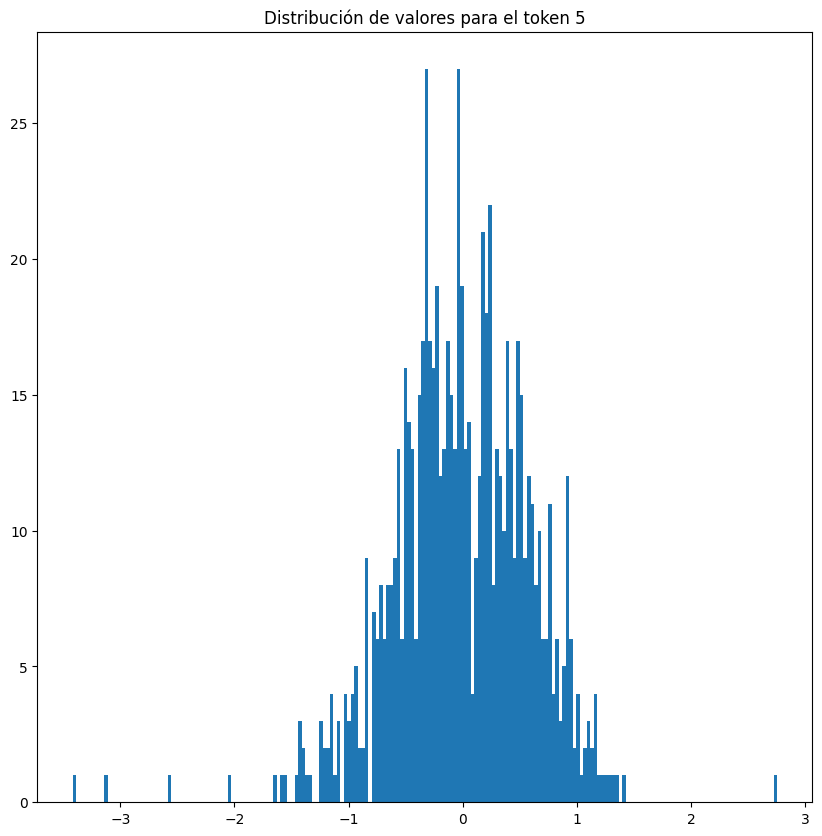

In [ ]:
import matplotlib.pyplot as plt

# Verificar las dimensiones de embeddings
print("Dimensiones de los embeddings:", embeddings.shape)

token_i = 5  # Token específico (por ejemplo, el token 5)

# Asegurarse de que el índice sea válido
if token_i < embeddings.shape[0]:
    # Obtener el embedding para el token específico
    vec = embeddings[token_i].detach().numpy()

    # Graficar la distribución de los valores de ese embedding
    plt.figure(figsize=(10, 10))
    plt.hist(vec, bins=200)
    plt.title(f"Distribución de valores para el token {token_i}")
    plt.show()
else:
    print("El índice del token no es válido.")